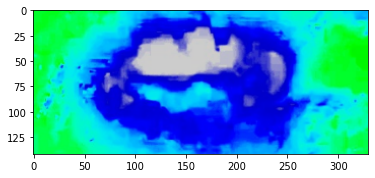

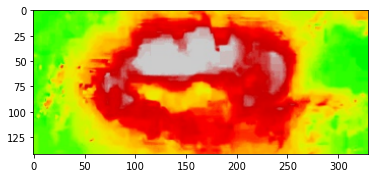

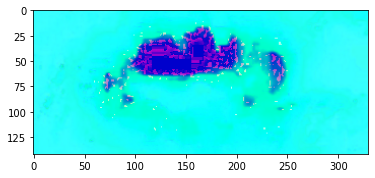

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio as ig

#frame =cv2.imread('/home/dl4/Task2/FILTERED_FRAMES/filter2/_tigfCJFLZg_00411_177.jpg')
frame =cv2.imread('filter_img.jpg')

plt.imshow(frame)
plt.show()

frame_1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_1)
plt.show()

hsv_frame = cv2.cvtColor(frame_1, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_frame)
plt.show()


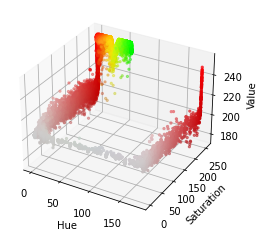

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

pixel_colors = frame_1.reshape((np.shape(frame_1)[0]*np.shape(frame_1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

h, s, v = cv2.split(hsv_frame)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()


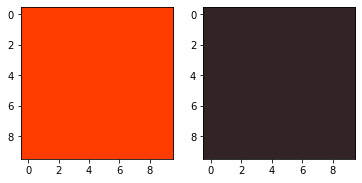

In [3]:
# light_orange = (1, 0, 255)
# dark_orange = (30, 255, 255)
light_orange = (0, 70, 50)
dark_orange = (10, 255, 255)

# light_orange = (0, 70, 50)
# dark_orange = (100, 61, 208)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

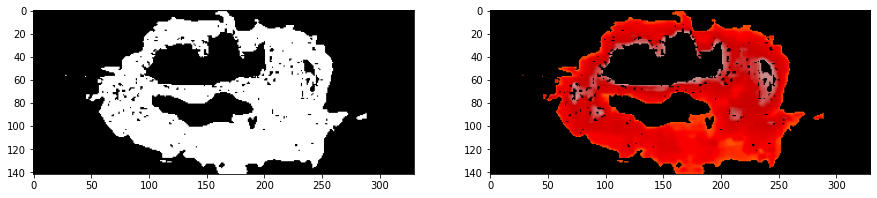

In [4]:
mask = cv2.inRange(hsv_frame, light_orange, dark_orange)
result = cv2.bitwise_and(frame_1, frame_1, mask=mask)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

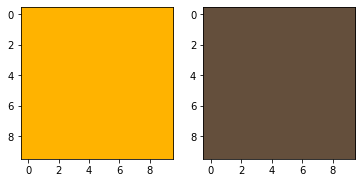

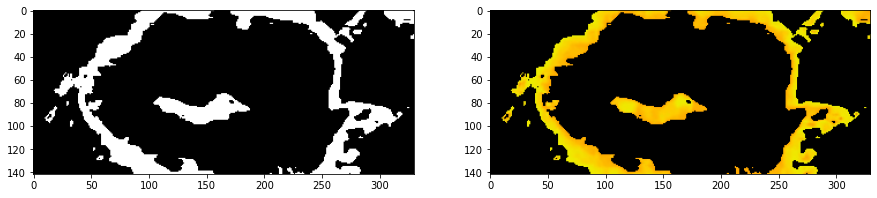

In [8]:
light_yellow= (20, 100, 100)
dark_yellow = (30, 255, 255)

lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

mask_yellow = cv2.inRange(hsv_frame, light_yellow, dark_yellow)
result_yellow = cv2.bitwise_and(frame_1, frame_1, mask=mask_yellow)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(mask_yellow, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_yellow)
plt.show()

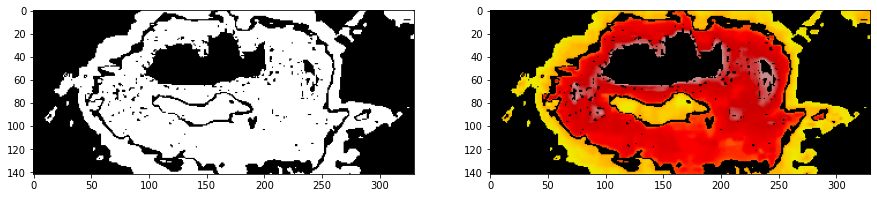

In [9]:
final_mask = mask + mask_yellow

result_final = cv2.bitwise_and(frame_1, frame_1, mask=final_mask)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_final)
plt.show()

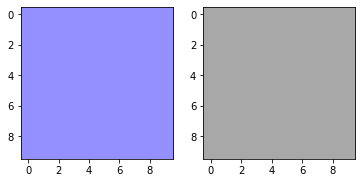

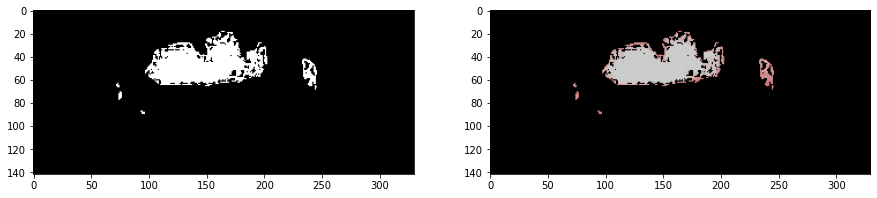

In [10]:
light_white= (0,0,168)
dark_white = (172,111,255)

lo_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

mask_white = cv2.inRange(hsv_frame, light_white, dark_white)
result_white = cv2.bitwise_and(frame_1, frame_1, mask=mask_white)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

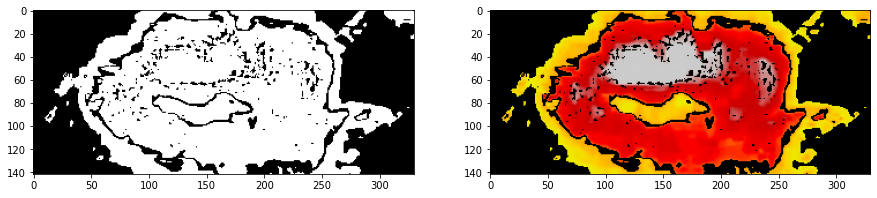

In [11]:
final_final_mask = mask + mask_yellow+mask_white

result_final_final = cv2.bitwise_and(frame_1, frame_1, mask=final_final_mask)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(final_final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_final_final)
plt.show()

In [12]:
#Ausgabe von Pixelanzahl
print("Pixelanzahl: "+str(np.count_nonzero(final_final_mask)))

Pixelanzahl: 26935
